In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm , skew
from  scipy import stats
from scipy.special import boxcox
import os 
import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv('../../data/train.csv',encoding= 'big5')
test = pd.read_csv('../../data/test.csv',encoding= 'big5')

In [107]:
print(train.shape,test.shape)

(100000, 132) (150000, 131)


In [15]:
data_all = pd.concat([train,test],axis=0)

In [16]:
data_all = data_all.reset_index()

In [17]:
Ans = data_all['Y1']

In [18]:
data_all = data_all.drop(['Y1'],axis=1)

In [19]:
data_all_na_col = []
na_num = []
for col in data_all.columns.tolist() :
    if data_all[col].isna().sum() == 0 :
        pass
    else :
        data_all_na_col.append(col)
        na_num.append(data_all[col].isna().sum())
        print(col,'na_num =',data_all[col].isna().sum())

ACCIDENT_HOSPITAL_REC_AMT na_num = 69005
ANNUAL_INCOME_AMT na_num = 96620
ANNUAL_PREMIUM_AMT na_num = 155189
ANNUITY_AMT na_num = 69005
APC_1ST_AGE na_num = 107496
APC_1ST_YEARDIF na_num = 107496
A_IND na_num = 198492
BMI na_num = 40337
B_IND na_num = 198492
C_IND na_num = 198492
DIEACCIDENT_AMT na_num = 69005
DIEBENEFIT_AMT na_num = 69005
DISEASES_HOSPITAL_REC_AMT na_num = 69005
EDUCATION_CD na_num = 50857
EXPIRATION_AMT na_num = 69005
FINANCETOOLS_A na_num = 156162
FINANCETOOLS_B na_num = 156162
FINANCETOOLS_C na_num = 156162
FINANCETOOLS_D na_num = 156162
FINANCETOOLS_E na_num = 156162
FINANCETOOLS_F na_num = 156162
FINANCETOOLS_G na_num = 156162
FIRST_CANCER_AMT na_num = 69005
GENDER na_num = 1695
IF_ADD_INSD_F_IND na_num = 129347
IF_ADD_INSD_G_IND na_num = 129347
IF_ADD_INSD_IND na_num = 185
IF_ADD_INSD_L_IND na_num = 129347
IF_ADD_INSD_Q_IND na_num = 129347
IF_ADD_INSD_R_IND na_num = 129347
IF_ISSUE_INSD_A_IND na_num = 49994
IF_ISSUE_INSD_B_IND na_num = 49994
IF_ISSUE_INSD_C_IND 

# FINANCETOOLS 有固定資料人都是na 可以直接新增成類別變數

In [20]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Columns: 132 entries, index to X_H_IND
dtypes: float64(30), int64(13), object(89)
memory usage: 251.8+ MB


In [21]:
def isna_ornot(df,target,new_col) :
    
    list_ = []
    
    for col in df[target].isna() :
        
        if col == True :
            
            list_.append(0)
        else :
            
            list_.append(1)
            
    df[new_col] = list_
        
    return df

In [22]:
for col in data_all_na_col :
    if data_all[col].isna().sum()  >= 2500 :
        data_all = isna_ornot(data_all,col,col+'_isna')
    else :
        pass

# List 
# Object , Int , Float _variable

In [23]:
object_list = []
int_list = []
float_list = []
for col in data_all.columns.tolist() :
    if data_all[col].dtype == 'object' :
        object_list.append(col)
    if data_all[col].dtype == 'int64'  :
        int_list.append(col)
    if data_all[col].dtype == 'float64' :
        float_list.append(col)

# Object list 

In [117]:
for col in object_list :
    if data_all[col].isna().sum() >= 2500 :
        data_all[col].replace(np.nan,'Unknow',inplace=True)
    else :
        pass

In [118]:
def replace_na_to_object (df,target) :
    df[target] = df[target].replace(np.nan(),'未知')
    
    return df

In [119]:
for col in object_list :
    if data_all[col].isna().sum() > 0 :
        print(col,'na_num =',data_all[col].isna().sum())

GENDER na_num = 1695
IF_ADD_INSD_IND na_num = 185
INSD_1ST_AGE na_num = 185
X_A_IND na_num = 52
X_B_IND na_num = 52
X_C_IND na_num = 52
X_D_IND na_num = 52
X_E_IND na_num = 52
X_F_IND na_num = 52
X_G_IND na_num = 52
X_H_IND na_num = 52


# Drop 剩下的類別 data

In [120]:
for col in float_list :
    if data_all[col].isna().sum() > 0 :
        print(col,'na_num =',data_all[col].isna().sum())

ACCIDENT_HOSPITAL_REC_AMT na_num = 69005
ANNUAL_INCOME_AMT na_num = 96620
ANNUAL_PREMIUM_AMT na_num = 155189
ANNUITY_AMT na_num = 69005
APC_1ST_YEARDIF na_num = 107496
BMI na_num = 40337
DIEACCIDENT_AMT na_num = 69005
DIEBENEFIT_AMT na_num = 69005
DISEASES_HOSPITAL_REC_AMT na_num = 69005
EDUCATION_CD na_num = 50857
EXPIRATION_AMT na_num = 69005
FIRST_CANCER_AMT na_num = 69005
ILL_ACCELERATION_AMT na_num = 69005
ILL_ADDITIONAL_AMT na_num = 69005
INPATIENT_SURGERY_AMT na_num = 69005
INSD_LAST_YEARDIF_CNT na_num = 185
L1YR_C_CNT na_num = 220078
LEVEL na_num = 107521
LONG_TERM_CARE_AMT na_num = 69005
MARRIAGE_CD na_num = 19421
MONTHLY_CARE_AMT na_num = 69005
OCCUPATION_CLASS_CD na_num = 8885
OUTPATIENT_SURGERY_AMT na_num = 69005
PAY_LIMIT_MED_MISC_AMT na_num = 69005
POLICY_VALUE_AMT na_num = 69005
RFM_M_LEVEL na_num = 107496
TERMINATION_RATE na_num = 107496


In [121]:
len(float_list)

30

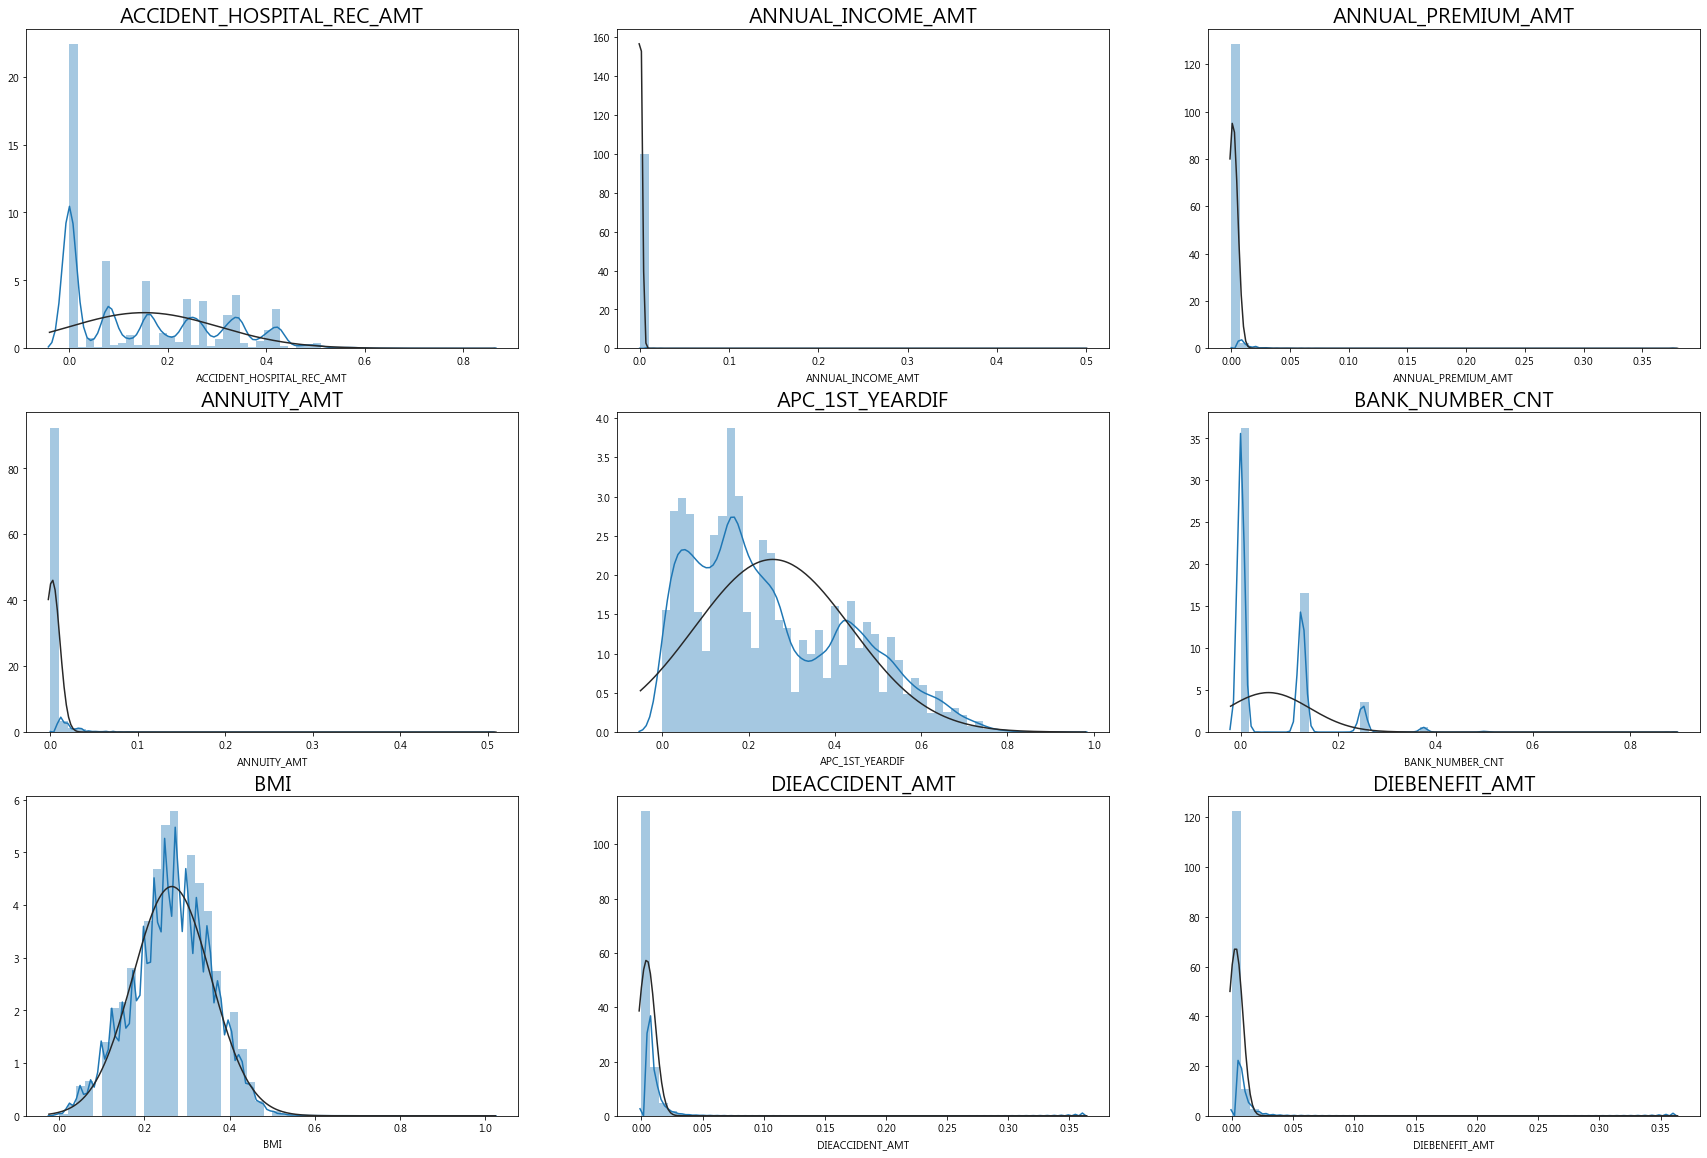

In [122]:
count = 1
plt.figure(figsize=(30,20))

for col in float_list[:9] :
    plt.subplot(3,3,count) 
    sns.distplot(data_all[col].dropna(),fit = norm)
    plt.title(col,fontsize = 20)
    
    count += 1
    
plt.show()

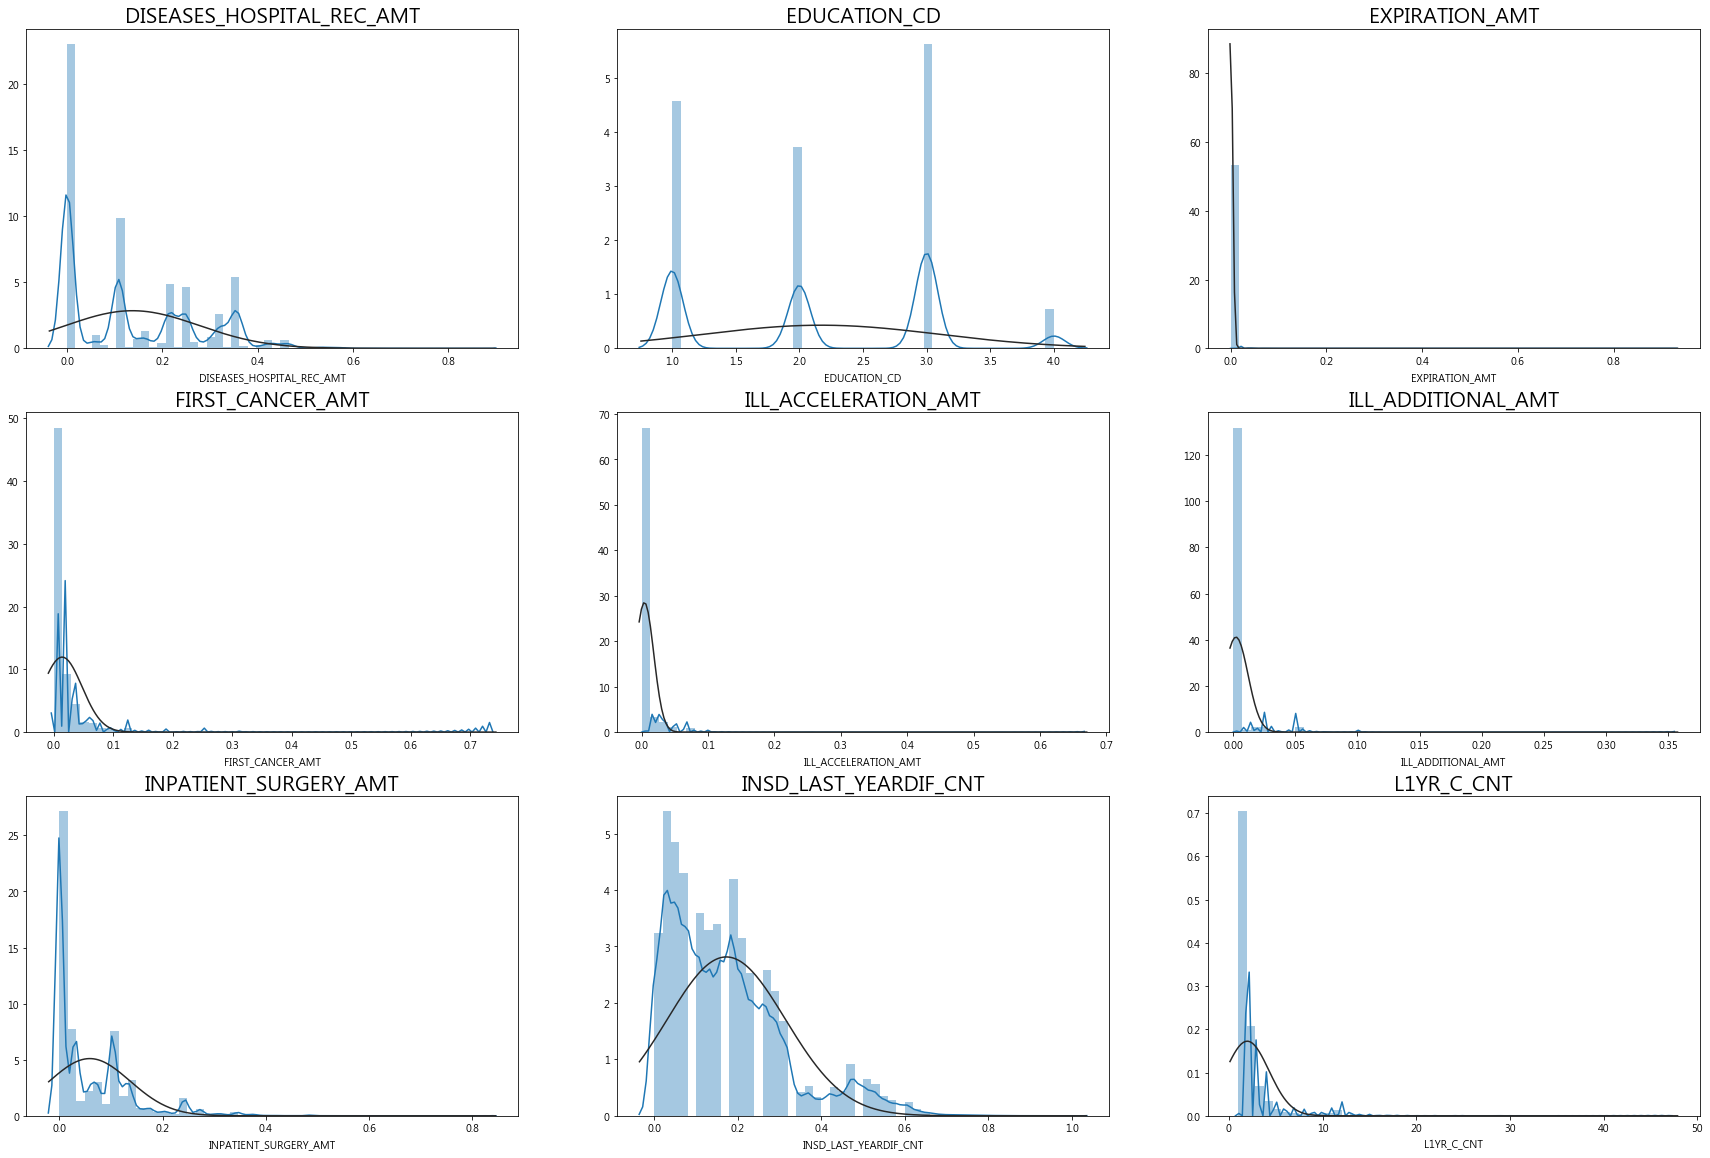

In [123]:
count = 1
plt.figure(figsize=(30,20))

for col in float_list[9:18] :
    plt.subplot(3,3,count) 
    sns.distplot(data_all[col].dropna(),fit = norm)
    plt.title(col,fontsize = 20)
    
    count += 1
    
plt.show()

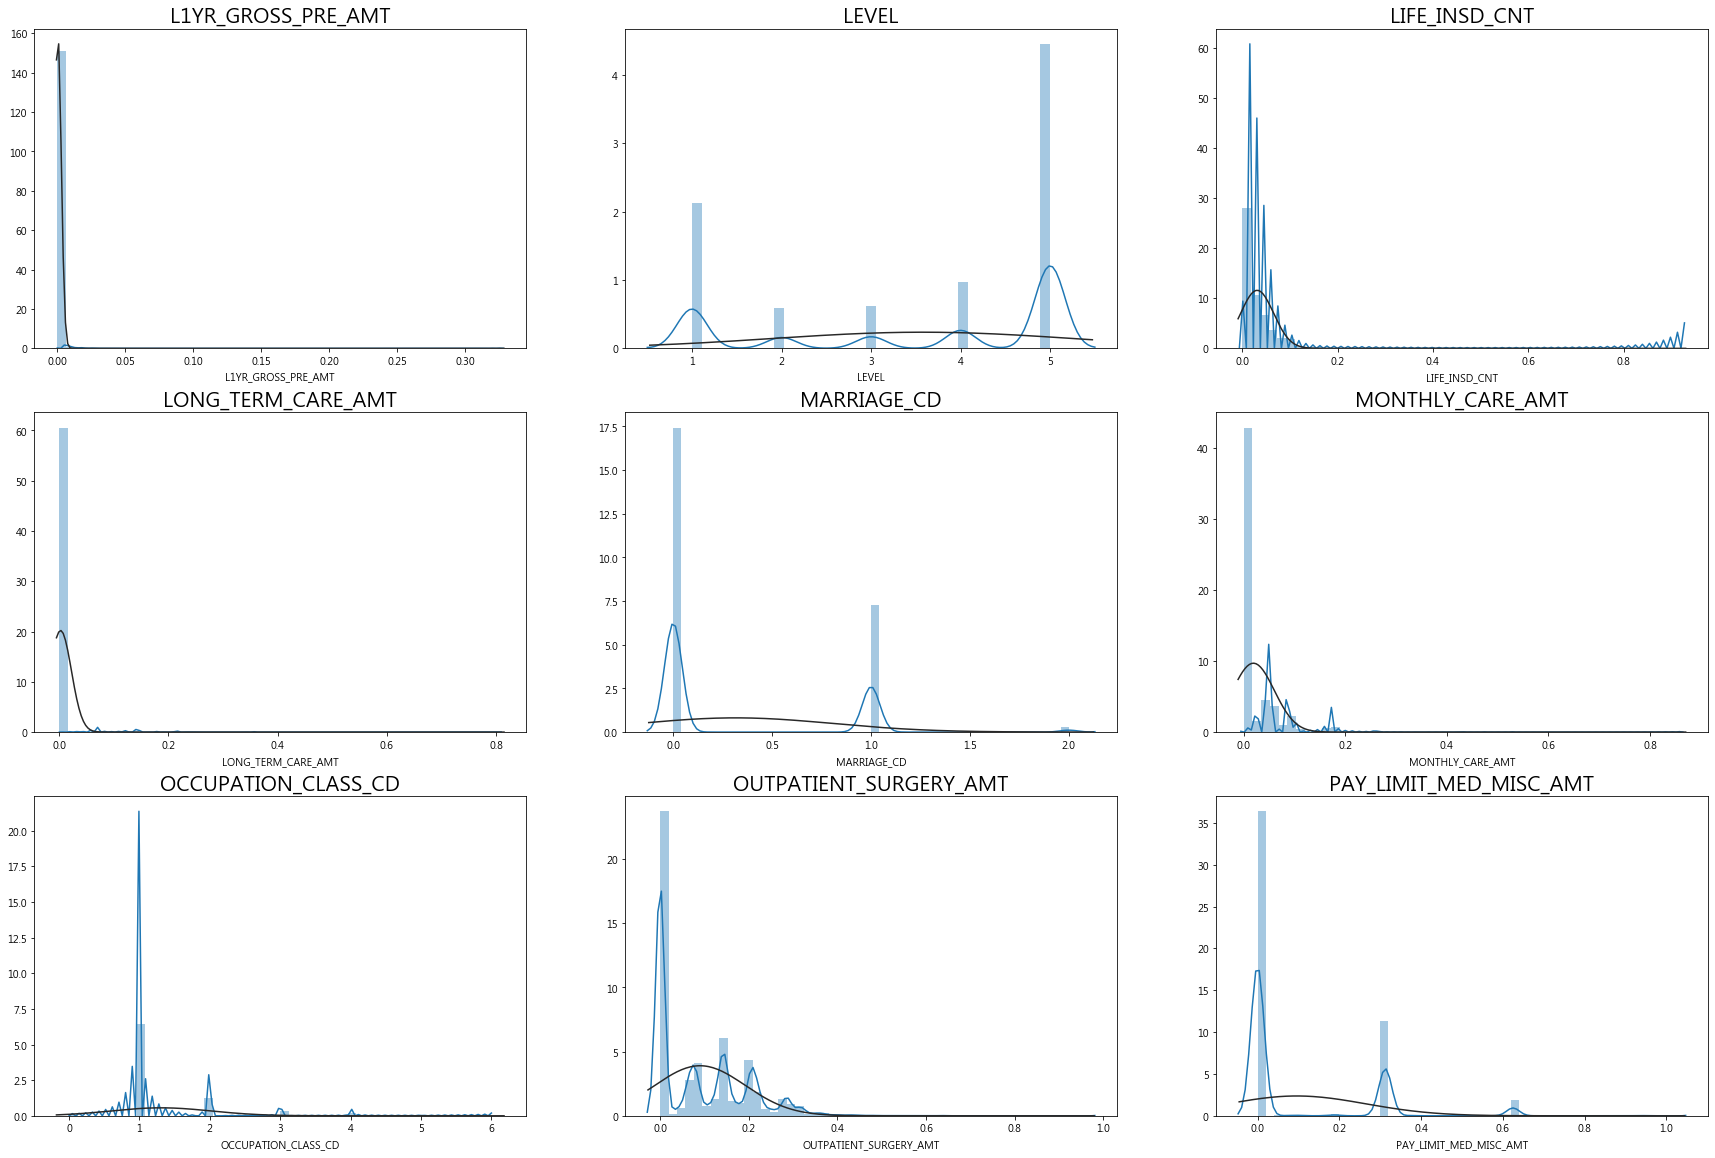

In [124]:
count = 1
plt.figure(figsize=(30,20))

for col in float_list[18:27] :
    plt.subplot(3,3,count) 
    sns.distplot(data_all[col].dropna(),fit = norm)
    plt.title(col,fontsize = 20)
    
    count += 1
    
plt.show()

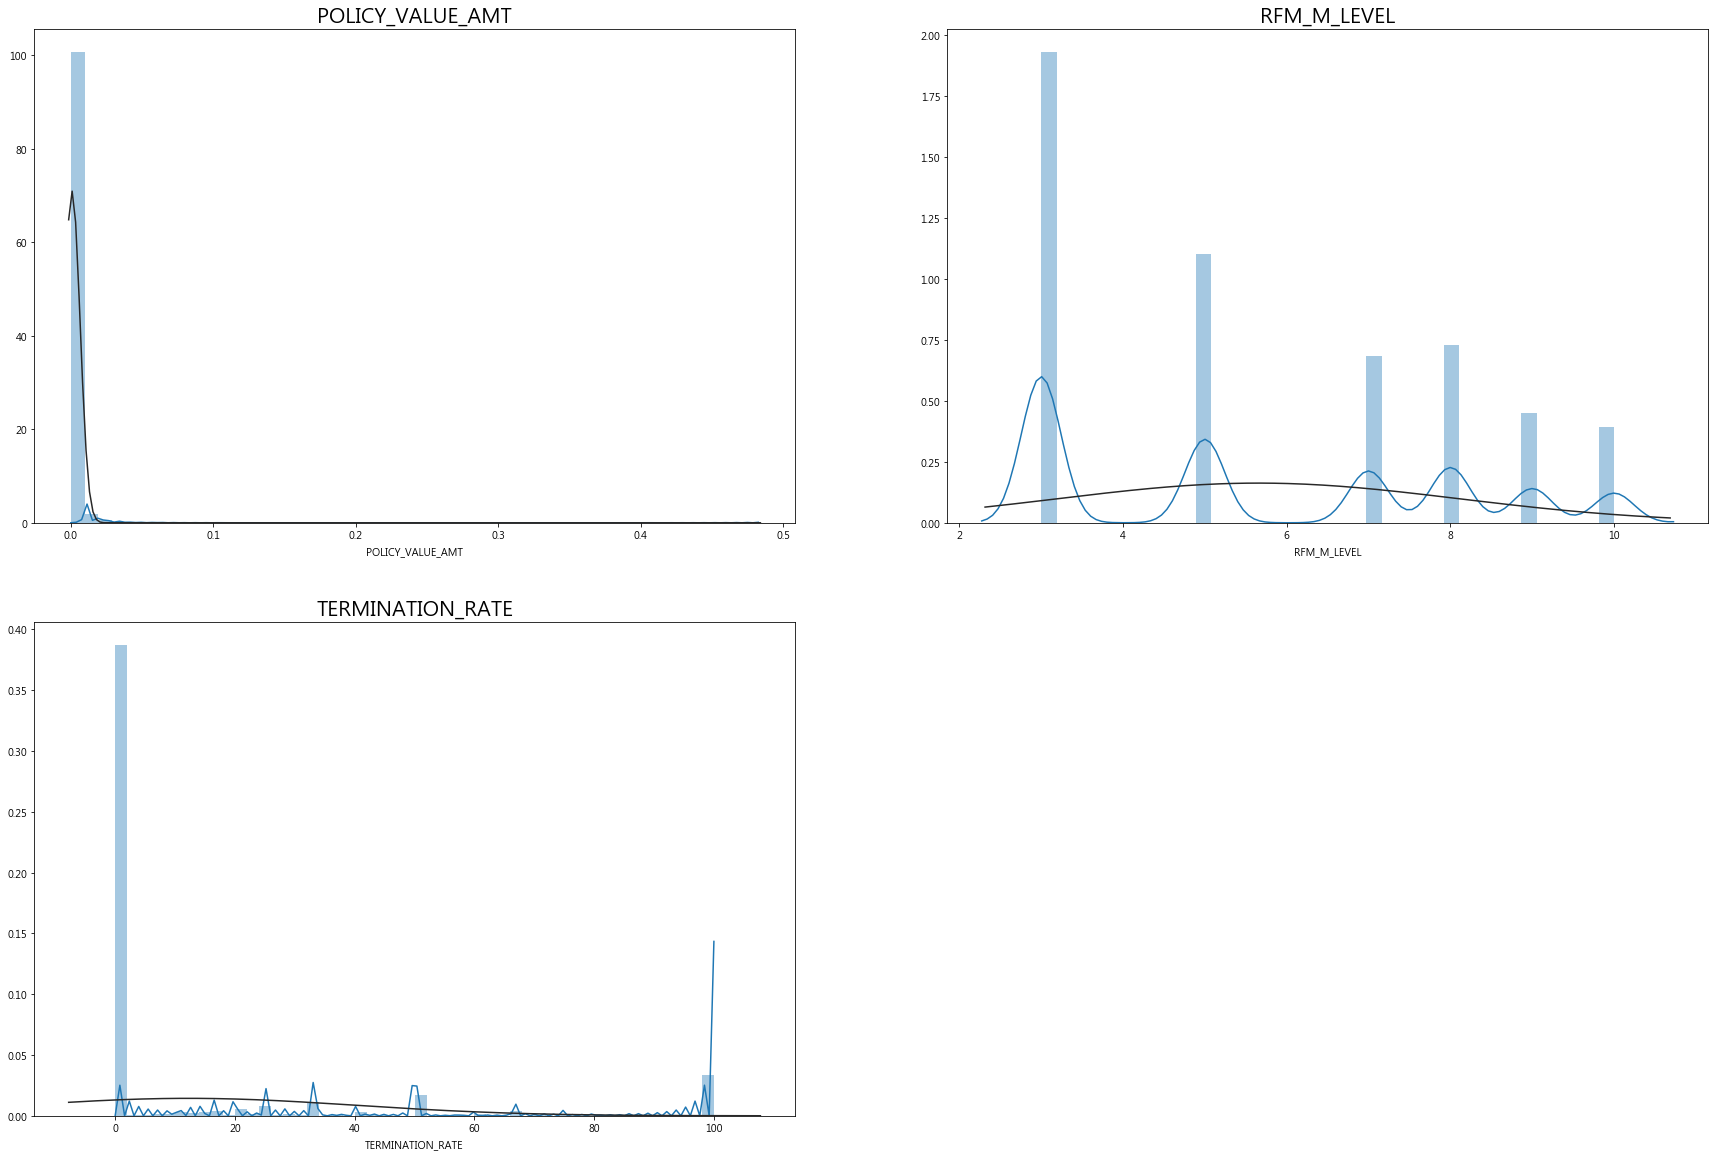

In [125]:
count = 1
plt.figure(figsize=(30,20))

for col in float_list[27:] :
    plt.subplot(2,2,count) 
    sns.distplot(data_all[col].dropna(),fit = norm)
    plt.title(col,fontsize = 20)
    
    count += 1
    
plt.show()

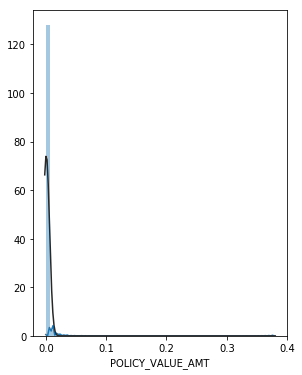

In [11]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot((train['POLICY_VALUE_AMT'].dropna()),fit= norm)
#plt.subplot(1,2,2)
#stats.probplot(boxcox(train['L1YR_GROSS_PRE_AMT'][(train['L1YR_GROSS_PRE_AMT']< 0.1)],0.15),plot=plt)
plt.show()

# 先轉換再填入Mean or Medium

In [126]:
def find_zero (df,target,new_col) :
    if (df[target] == 0 ).sum() > 1000 :
        df[target+'_zero'] = df

In [128]:
for col in float_list :
    if (data_all[col] == 0 ).sum() > 1000 :   ### 0 數量是否太多
        data_all[col+'_is0'] = data_all[col]   ###太多則創立一個新的columns 
        for i in range(len(data_all[col])) :  ### 找出 0 則標示為 1   非0 標示為0 
            if data_all[col][i] == 0 :
                data_all[col+'_is0'][i] = 1
            else :
                data_all[col+'_is0'][i] = 0
    else :
        pass

In [ ]:
def fill_float_na (df,target,lam) :
    
    a = boxcox(df[target].dropna(),lam)
    M = a.sum() / (len(a) - len(a[a == 0]))
    df[target] = df[target].fillna(M)
    
    return df

In [98]:
for col in float_list :
    data_all[col+'_is0'] = data_all[col]
    for i in range(len(data_all[col])) :
        if data_all[col][i] == 0 :
            data_all[col+'_is0'][i] = 1
        else :
            data_all[col+'_is0'][i] = 0

SyntaxError: invalid syntax (<ipython-input-98-6e3c940ffb72>, line 1)

In [100]:
data_all['POLICY_VALUE_AMT'+'_is0'] = data_all['POLICY_VALUE_AMT']
for i in range(len(data_all['POLICY_VALUE_AMT'])) :
    if data_all['POLICY_VALUE_AMT'][i] == 0 :
        data_all['POLICY_VALUE_AMT'+'_is0'][i] = 1
    else :
        data_all['POLICY_VALUE_AMT'+'_is0'][i] = 0

In [102]:
data_all['POLICY_VALUE_AMT_isnot']

0         0
1         0
2         1
3         0
4         1
         ..
249995    0
249996    0
249997    0
249998    0
249999    0
Name: POLICY_VALUE_AMT_isnot, Length: 250000, dtype: int64

# 找出分配特別偏斜的columns 

# 之後做log1p or boxcox 轉換

In [77]:
for col in int_list :
    if data_all[col].isna().sum() > 0 :
        print(col,'na_num =',data_all[col].isna().sum())

# int 資料不存在na 值

In [51]:
a = str()
for num in list(set(na_num)) :
    a = a + str(num) + ':'
    for col in data_all_na_col :
        if data_all[col].isna().sum() == num :
            a = a + str(col) + '--'
    a += ','

In [52]:
b = a.split(',')

In [53]:
group_dict = {}
for i in b[:-1] :
    list_a = i.split(':')
    group_dict[list_a[0]] = list_a[1:]

In [54]:
group_dict

{'107521': ['LEVEL--RFM_R--'],
 '156162': ['FINANCETOOLS_A--FINANCETOOLS_B--FINANCETOOLS_C--FINANCETOOLS_D--FINANCETOOLS_E--FINANCETOOLS_F--FINANCETOOLS_G--'],
 '129347': ['IF_ADD_INSD_F_IND--IF_ADD_INSD_G_IND--IF_ADD_INSD_L_IND--IF_ADD_INSD_Q_IND--IF_ADD_INSD_R_IND--'],
 '107496': ['APC_1ST_AGE--APC_1ST_YEARDIF--REBUY_TIMES_CNT--RFM_M_LEVEL--TERMINATION_RATE--'],
 '50857': ['EDUCATION_CD--'],
 '49994': ['IF_ISSUE_INSD_A_IND--IF_ISSUE_INSD_B_IND--IF_ISSUE_INSD_C_IND--IF_ISSUE_INSD_D_IND--IF_ISSUE_INSD_E_IND--IF_ISSUE_INSD_F_IND--IF_ISSUE_INSD_G_IND--IF_ISSUE_INSD_H_IND--IF_ISSUE_INSD_I_IND--IF_ISSUE_INSD_J_IND--IF_ISSUE_INSD_K_IND--IF_ISSUE_INSD_L_IND--IF_ISSUE_INSD_M_IND--IF_ISSUE_INSD_N_IND--IF_ISSUE_INSD_O_IND--IF_ISSUE_INSD_P_IND--IF_ISSUE_INSD_Q_IND--'],
 '96620': ['ANNUAL_INCOME_AMT--'],
 '69005': ['ACCIDENT_HOSPITAL_REC_AMT--ANNUITY_AMT--DIEACCIDENT_AMT--DIEBENEFIT_AMT--DISEASES_HOSPITAL_REC_AMT--EXPIRATION_AMT--FIRST_CANCER_AMT--ILL_ACCELERATION_AMT--ILL_ADDITIONAL_AMT--INPATIE

In [31]:
data_all['FINANCETOOLS_A']

0         NaN
1         NaN
2           Y
3         NaN
4         NaN
         ... 
249995    NaN
249996    NaN
249997    NaN
249998      Y
249999      N
Name: FINANCETOOLS_A, Length: 250000, dtype: object

# 經過神秘轉換的資料 要用boxcox轉換回來 ( 而且必須去除離群值，以及0太多的必須新增新特徵)

In [12]:
from category_encoders.target_encoder import TargetEncoder

# 類別變數

In [36]:
nd_target_encoding = []
nd_one_encoding = []
for col in object_list :
    if len(train[col].unique()) > 3 :
        nd_target_encoding.append(col)
    else :
        nd_one_encoding.append(col)

In [41]:
nd_target_encoding

['AGE',
 'APC_1ST_AGE',
 'CHARGE_CITY_CD',
 'CONTACT_CITY_CD',
 'CUST_9_SEGMENTS_CD',
 'INSD_1ST_AGE',
 'REBUY_TIMES_CNT',
 'RFM_R']

In [45]:
train['y1'] = train['Y1']
train['y1'].replace('Y',1,inplace=True)
train['y1'].replace('N',0,inplace=True)

In [49]:
tar = TargetEncoder(smoothing=0.9,verbose=2).fit(train[nd_target_encoding],train['y1'])

In [51]:
tar.transform(test[nd_target_encoding])

,AGE,APC_1ST_AGE,CHARGE_CITY_CD,CONTACT_CITY_CD,CUST_9_SEGMENTS_CD,INSD_1ST_AGE,REBUY_TIMES_CNT,RFM_R
0,0.003234,0.033145,0.027251,0.019730,0.006325,0.027123,0.022464,0.053068
1,0.003234,0.033145,0.027251,0.019730,0.006325,0.006953,0.022464,0.012521
2,0.003234,0.033145,0.027251,0.019730,0.006325,0.027123,0.022464,0.025384
3,0.003234,0.033145,0.027251,0.019730,0.006325,0.027123,0.022464,0.012521
4,0.003234,0.033145,0.027251,0.019730,0.006325,0.027123,0.022464,0.053068
5,0.003234,0.033145,0.027251,0.019730,0.032659,0.027123,0.022464,0.053068
6,0.003234,0.033145,0.027251,0.019730,0.006325,0.006953,0.022464,0.025384
7,0.003234,0.033145,0.027251,0.019730,0.006325,0.027123,0.022464,0.012521
8,0.003234,0.033145,0.027251,0.019730,0.032659,0.027123,0.022464,0.053068
9,0.003234,0.033145,0.027251,0.019730,0.006325,0.006953,0.022464,0.012521
